# **Employee Attrition**

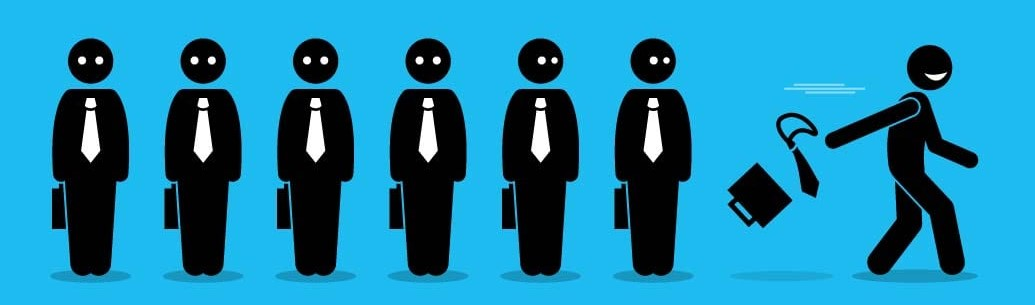

## **Objective:-To know the satisfactory level of employees towards their job and working conditions and to know recognize the factors affecting the attrition rate.**

In [ ]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the dataset

df=pd.read_csv("/content/HR Employee Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#checking datatype of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#describing numerical columns of dataset

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


This function provides statistics information like count,mean,std,min,25%,50%,75% and max values of each numeric columns.

In [ ]:
#rows are 1470 and columns are 35
df.shape

(1470, 35)

In [ ]:
df.isnull().sum().any()#checking null values are presernt or not

False

In [ ]:
#checking if any duplicate values are present or not

df.duplicated().sum()

0

In [ ]:
#column names of dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#**Exploratory Data Analysis**

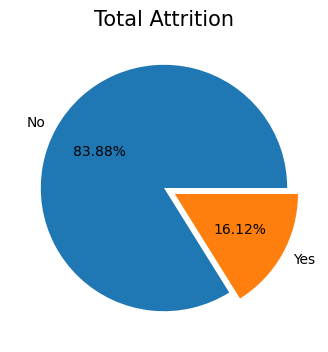

In [ ]:
a=df['Attrition'].value_counts().reset_index()
plt.figure(figsize=(7,4))
explode=(0,0.1)
plt.title("Total Attrition",fontsize=15)
plt.pie(a['Attrition'],labels=a['index'],autopct='%1.2f%%',explode=explode)
plt.show()

Total Attrition percentage is 16.12%.



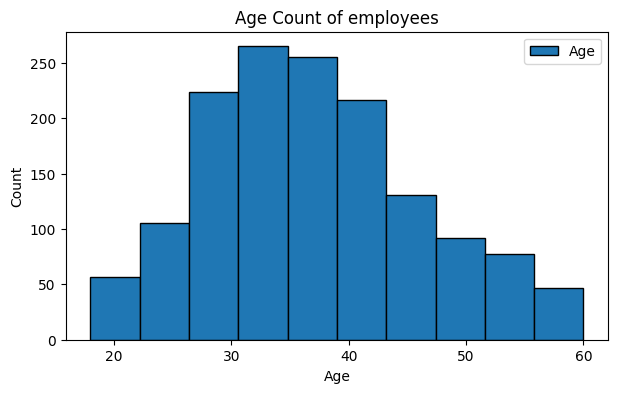

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(df['Age'],bins=10,edgecolor='k',label='Age')
plt.title('Age Count of employees')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

 This graph shows the maximum count of employees in the 30 to 40 age range.

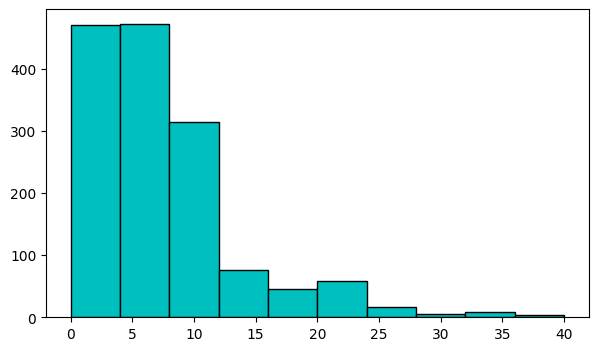

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(df['YearsAtCompany'],bins=10,color='c',edgecolor='k')
plt.show()

This graph shows that many employees has shortest tenures at the company, with a noticeable concentration in the lower range of years at the organization.






In [ ]:
a = df.groupby(['BusinessTravel', 'Gender']).size().reset_index(name='Count')
b=a[a['Gender']=='Male']
c=a[a['Gender']=='Female']

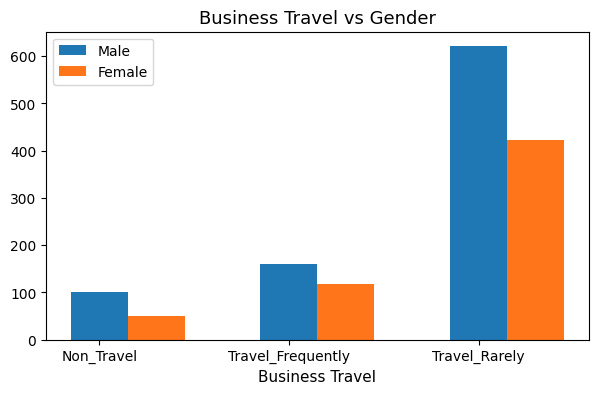

In [ ]:
plt.figure(figsize=(7,4))
grp_width=0.3
d=np.arange(len(b['BusinessTravel']))
plt.xticks(d,['Non_Travel','Travel_Frequently','Travel_Rarely'])
plt.bar(d,b['Count'],label="Male",width=grp_width)
plt.bar(d+0.3,c['Count'],label="Female",width=grp_width,color='#ff751a')
plt.title('Business Travel vs Gender',fontsize=13)
plt.xlabel('Business Travel',fontsize=11)
plt.legend()
plt.show()

The graph shows the attrition rate is maximum for the employee who rarely travel.

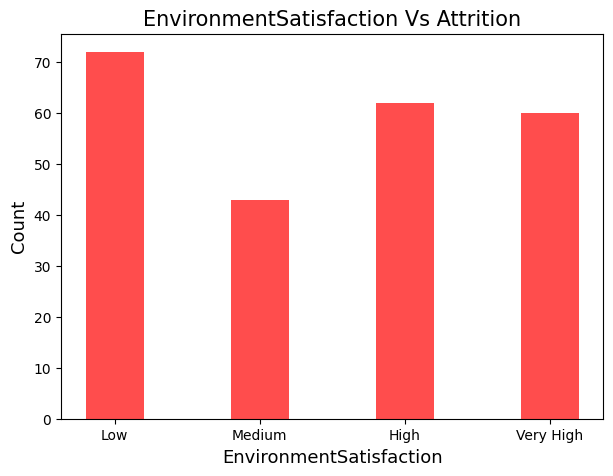

In [ ]:
env_sat=df.groupby(['EnvironmentSatisfaction','Attrition']).size().reset_index()
env_sat.rename(columns={0:'Count'},inplace=True)
env_sat=env_sat[env_sat['Attrition']=='Yes']
a=['Low','Medium','High','Very High']
plt.figure(figsize=(7,5))
plt.title("EnvironmentSatisfaction Vs Attrition",fontsize=15)
plt.xlabel("EnvironmentSatisfaction",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.bar(a,env_sat['Count'],width=0.4,color='#ff4d4d')
plt.show()


This graph shows relationship between Environment Satisfaction and Attrition when the employee are not comfortable with working environment they are more likely to leave their job.

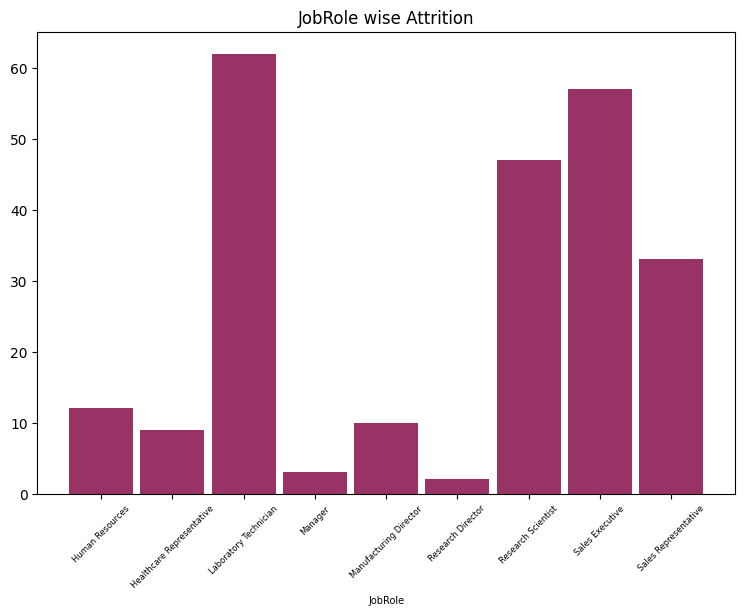

In [ ]:
dep=df.groupby(['Department','JobRole','Attrition']).size().reset_index()
dep.rename(columns={0:'Count'},inplace=True)
dep_yes=dep[dep['Attrition']=='Yes']
plt.figure(figsize=(9,6))
plt.xticks(fontsize=6,rotation=45)
plt.xlabel("JobRole",fontsize=7)
plt.title("JobRole wise Attrition")
plt.bar(dep_yes['JobRole'],dep_yes['Count'],width=0.9,color='#993366')
plt.show()

In this graph Laboratory Technician are doing more attrition with respect to other jobroles.

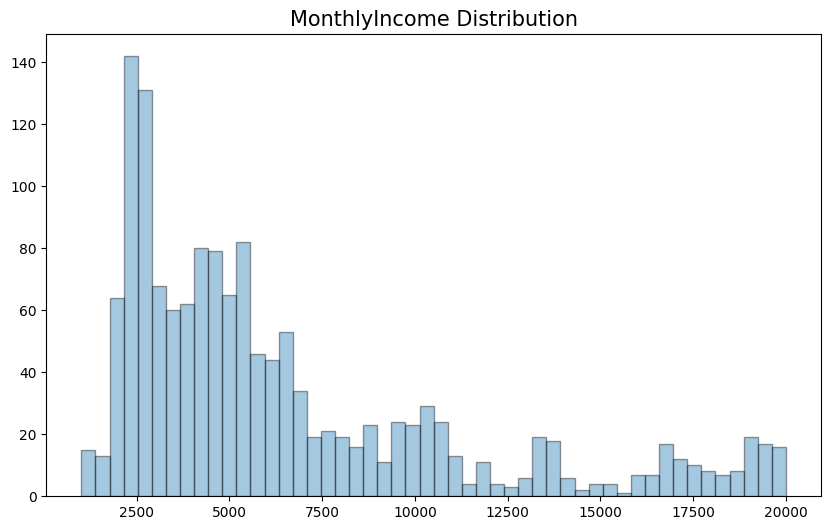

In [ ]:
plt.figure(figsize=(10,6))
plt.title("MonthlyIncome Distribution",fontsize=15)
plt.hist(df['MonthlyIncome'],bins=50,edgecolor='k',alpha=0.4)
plt.show()

The Most common range of Monthly Income is around 2500

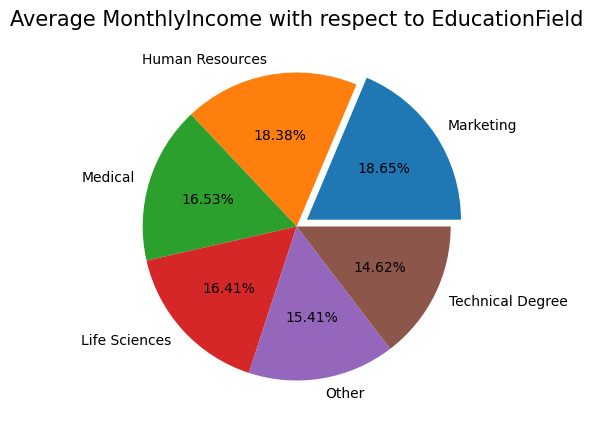

In [ ]:
avg_salary=df.groupby('EducationField')['MonthlyIncome'].mean().reset_index()
avg_salary=avg_salary.sort_values(by='MonthlyIncome',ascending=False)
plt.figure(figsize=(7,5))
exp=(0.08,0,0,0,0,0)
plt.title("Average MonthlyIncome with respect to EducationField",fontsize=15)
plt.pie(avg_salary['MonthlyIncome'],labels=avg_salary['EducationField'],autopct='%1.2f%%',explode=exp)
plt.show()



This graph shows relationship with MonthlyIncome and EducationField.The average income comes from Marketing EducationField is maximum as comapred to other EducationField.

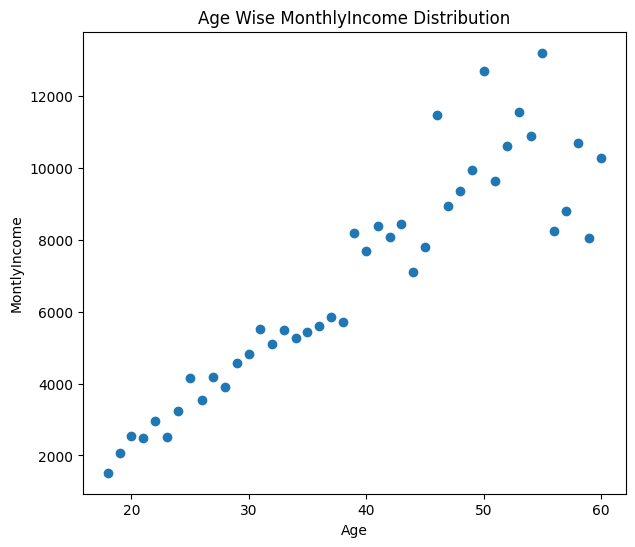

In [ ]:
a=df.groupby('Age')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(7,6))
plt.scatter(a.Age,a.MonthlyIncome)
plt.title('Age Wise MonthlyIncome Distribution')
plt.ylabel('MontlyIncome')
plt.xlabel('Age')
plt.show()

This plot shows the monthly income is increasing with age, and that indicating the older individuals have higher average monthly incomes.

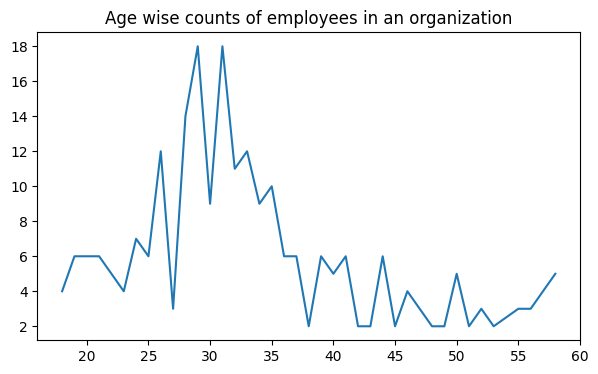

In [ ]:
age_att =df.groupby(['Attrition','Age']).size().reset_index(name='Count')
age_att.columns = ['Attrition', 'Age', 'Count']
a=age_att[age_att['Attrition']=='Yes']
plt.figure(figsize=(7,4))
plt.title('Age wise counts of employees in an organization')
plt.plot(a['Age'],a['Count'])
plt.show()

The graph indicates higher attrition among employees aged 28 to 34.







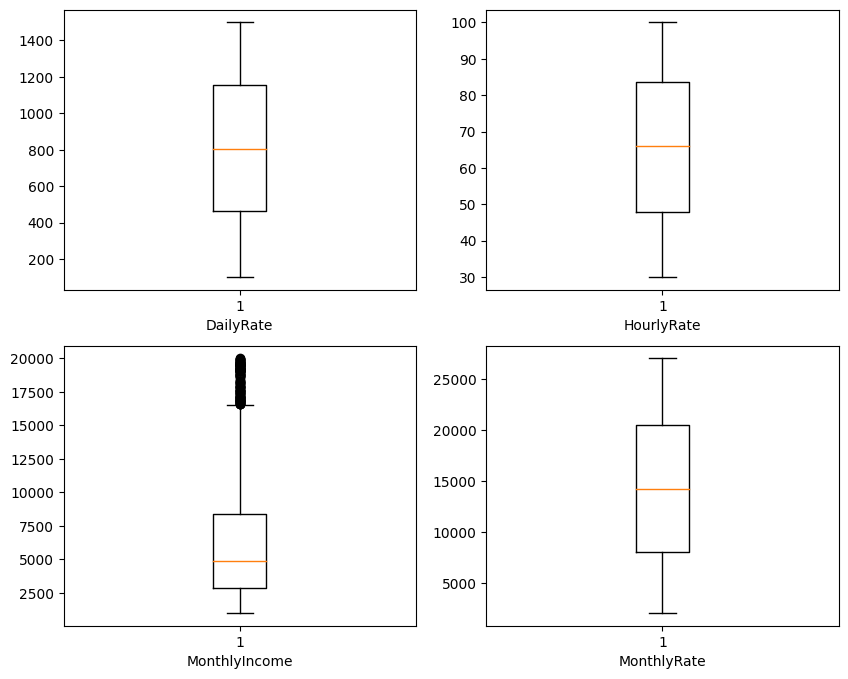

In [ ]:
a=['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']
plt.figure(figsize=(10,8))
for i, column in enumerate(a,1):
    plt.subplot(2,2,i)
    plt.boxplot(df[column])
    plt.xlabel(column)

In this graph MonthlyIncome has few outliers, we will consider this if there will be low accuracy.

Text(0.5, 1.0, 'Correlation Heatmap For Numerical Columns')

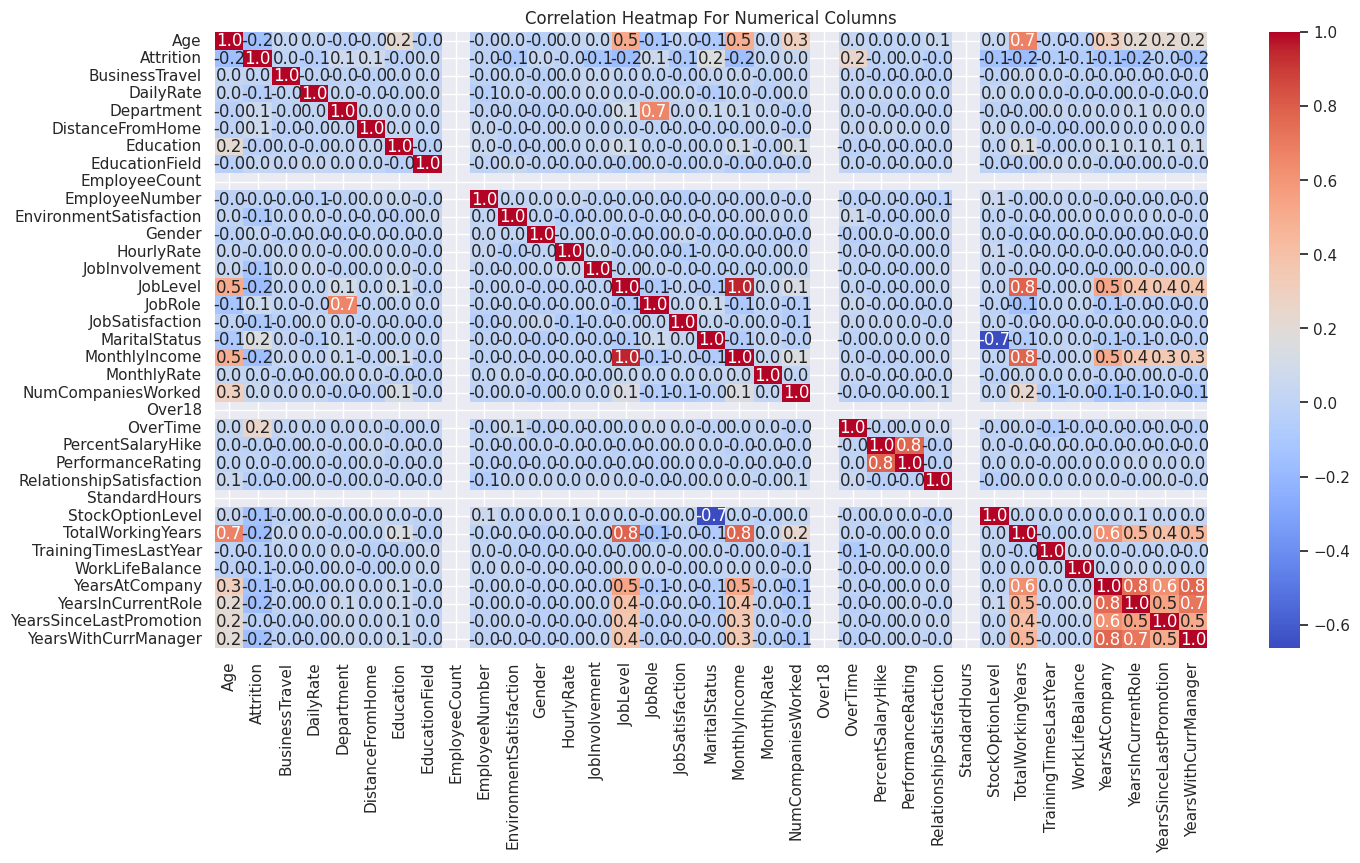

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.1f')
plt.title("Correlation Heatmap For Numerical Columns")

# **Pre-Processing**

In [ ]:
encode=LabelEncoder()
df['Attrition']=encode.fit_transform(df['Attrition'])
df['BusinessTravel']=encode.fit_transform(df['BusinessTravel'])
df['Department']=encode.fit_transform(df['Department'])
df['EducationField']=encode.fit_transform(df['EducationField'])
df['Gender']=encode.fit_transform(df['Gender'])
df['JobRole']=encode.fit_transform(df['JobRole'])
df['MaritalStatus']=encode.fit_transform(df['MaritalStatus'])
df['Over18']=encode.fit_transform(df['Over18'])
df['OverTime']=encode.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


#**Model Selection**

In [ ]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
x_train.shape,y_train.shape

((1176, 34), (1176,))

In [ ]:
x_test.shape,y_test.shape

((294, 34), (294,))

#**Model Building**

In [ ]:
data={'Model Name':[],'Accuracy':[]}
df1=pd.DataFrame(data)

### **GaussianNB**

In [ ]:
gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc_gb=(100*accuracy_score(y_test,pred))
df2={'Model Name':'GaussianNB','Accuracy':acc_gb}
df1=df1.append(df2,ignore_index=True)

### **MultinomialNB**

In [ ]:
ml=MultinomialNB()
ml.fit(x_train,y_train)
pred2=ml.predict(x_test)
acc_ml=(100*accuracy_score(y_test,pred2))
df2={'Model Name':'MultinomialNB','Accuracy':acc_ml}
df1=df1.append(df2,ignore_index=True)

### **DecisionTreeClassifier**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred3=dt.predict(x_test)
acc_dt=(100*accuracy_score(y_test,y_pred3))
df2={'Model Name':'DecisionTreeClassifier','Accuracy':acc_dt}
df1=df1.append(df2,ignore_index=True)

### **KNeighborsClassifier**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred5=knn.predict(x_test)
acc_knn=(100*accuracy_score(y_test,y_pred5))
df2={'Model Name':'KNeighborsClassifier','Accuracy':acc_knn}
df1=df1.append(df2,ignore_index=True)

### **RandomForestClassifier**

In [ ]:
random=RandomForestClassifier()
random.fit(x_train,y_train)
y_pred6=random.predict(x_test)
acc_random=(100*accuracy_score(y_test,y_pred6))
df2={'Model Name':'RandomForestClassifier','Accuracy':acc_random}
df1=df1.append(df2,ignore_index=True)

### **Support vector machine**

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
y_pred4=svm.predict(x_test)
acc_svm=(100*accuracy_score(y_test,y_pred4))
df2={'Model Name':'SVC','Accuracy':acc_svm}
df1=df1.append(df2,ignore_index=True)

## **Model Evaluation**

In [ ]:
df1

,Model Name,Accuracy
0,GaussianNB,78.571429
1,MultinomialNB,52.380952
2,DecisionTreeClassifier,76.530612
3,KNeighborsClassifier,84.013605
4,RandomForestClassifier,86.394558
5,SVC,85.374150


The RandomForestClassifier achieved a maximum accuracy of 87.414966%

Text(0.5, 1.0, 'Confusion Matix of RandomForestClassifier')

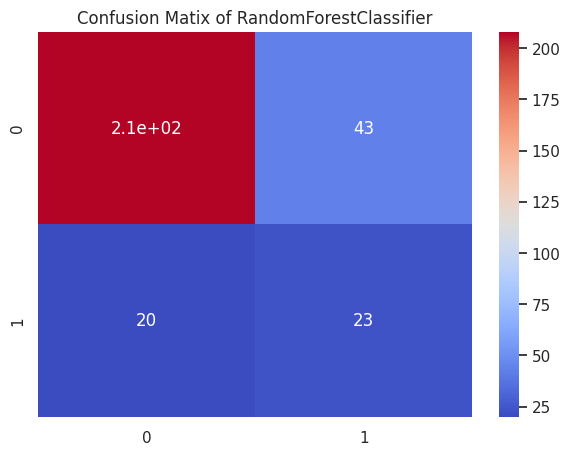

In [ ]:
plt.figure(figsize=(7,5))
cf_random=confusion_matrix(y_test,pred)
sns.heatmap(cf_random,annot=True,cmap='coolwarm')
plt.title("Confusion Matix of RandomForestClassifier")

## Result:-We can see the true positives in the confusion matrix of the RandomForestClassifier are more which demonstrate that the model is predicting good so we can consider it further.